### Using Seaborn and Pandas for visualisation

In [3]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_len', ylabel='sepal_wid'>

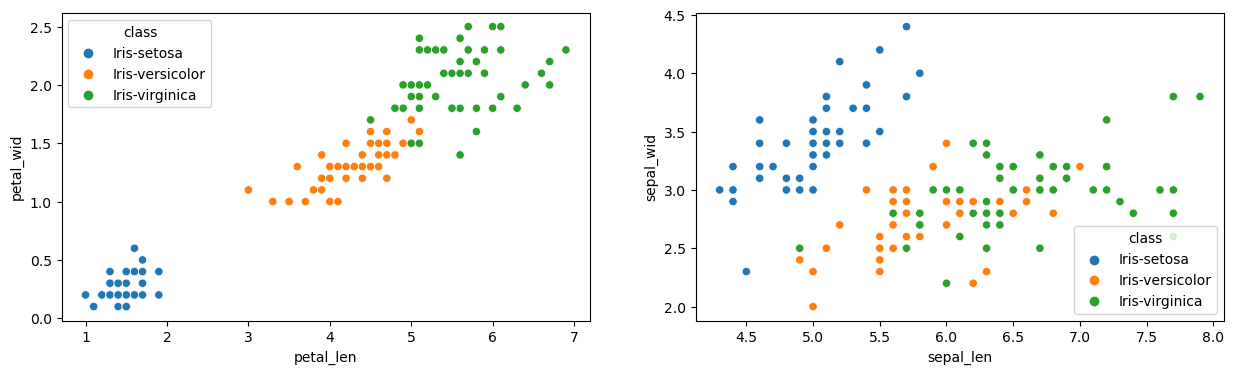

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,4)) #why he adjust this before running the scatter plots?
sns.scatterplot(x = iris['petal_len'], y = iris['petal_wid'], hue = iris['class'], ax=axs[0])
sns.scatterplot(x = iris['sepal_len'], y = iris['sepal_wid'], hue = iris['class'], ax=axs[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


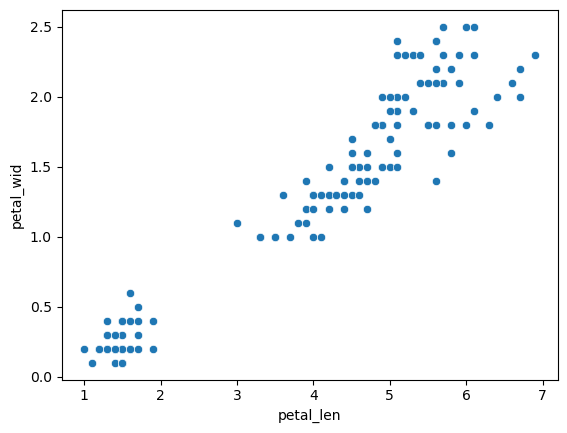

In [12]:
sns.scatterplot(iris['petal_len'], iris['petal_wid']);

In [13]:
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


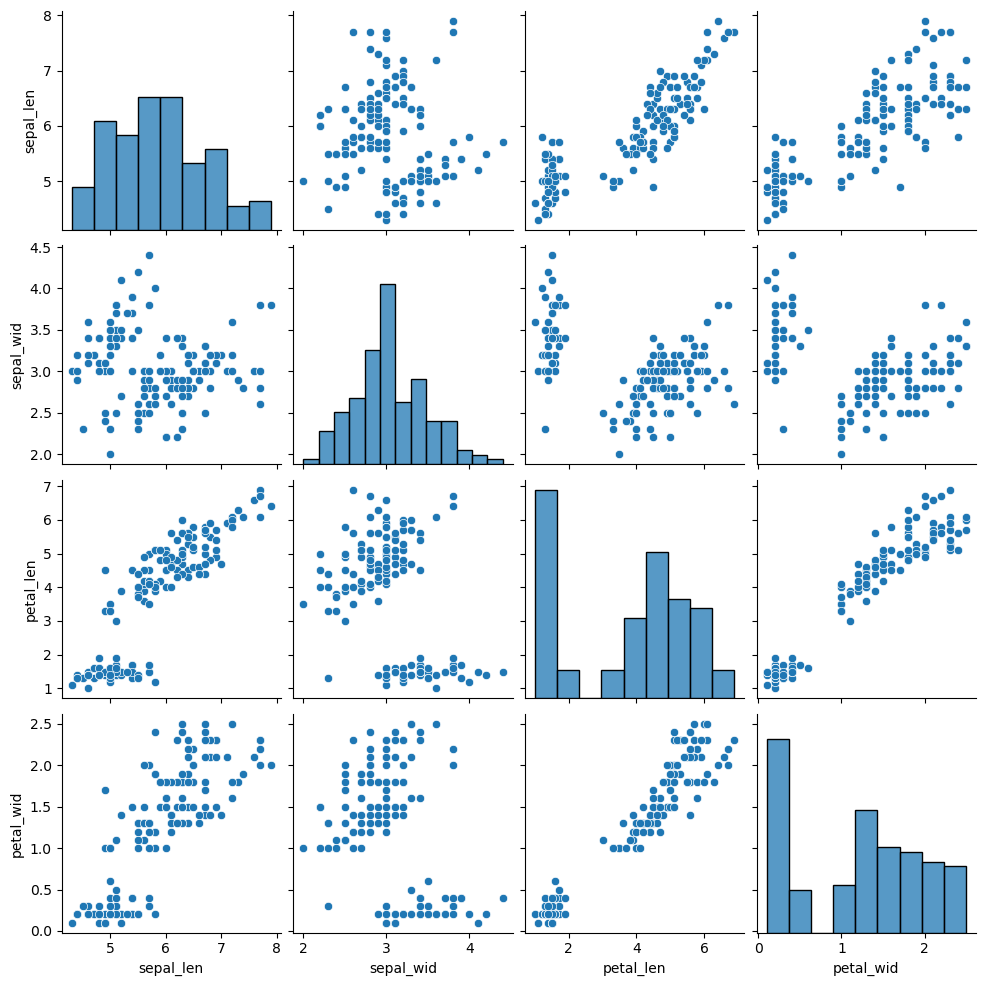

In [14]:
sns.pairplot(iris)

[]

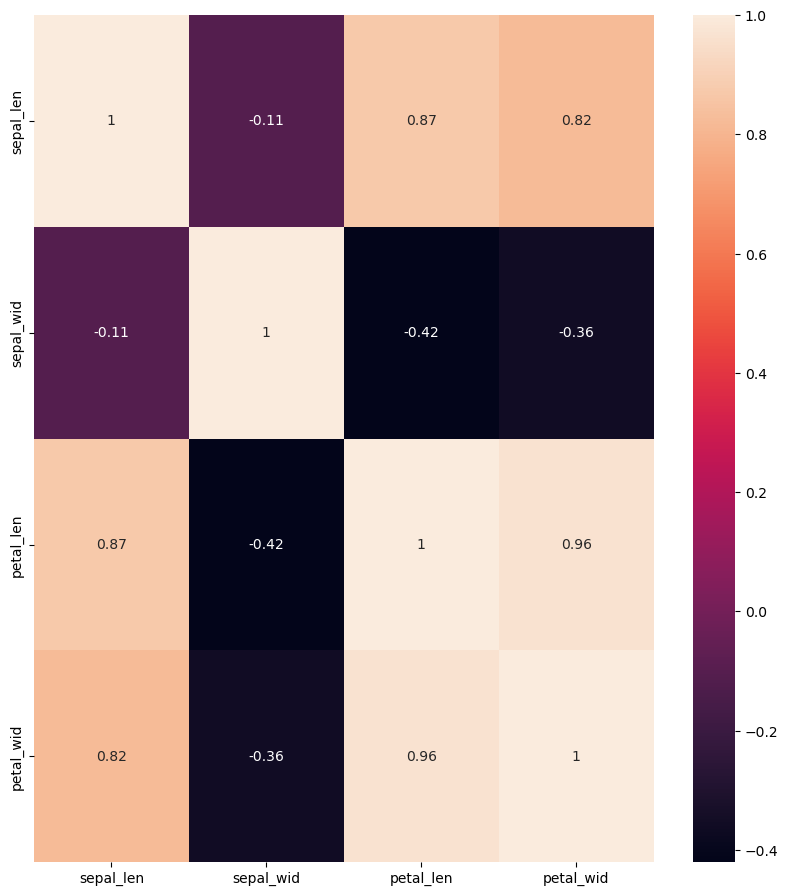

In [15]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)# annot=true gives us the numbers on each cell, otherwise it will be just the colours
plt.plot()

### Calculate the Pearson Correlation Coefficient between all features

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_wid,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_wid,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

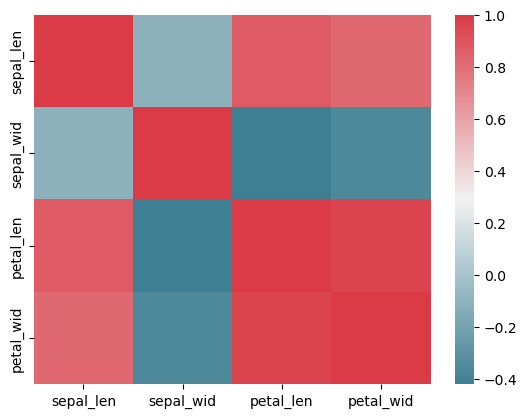

In [20]:
corr_df = iris.corr(method='pearson')
display(corr_df)

sns.heatmap(corr_df, cmap=sns.diverging_palette(220,10, as_cmap=True),
           xticklabels=corr_df.columns.values,
           yticklabels=corr_df.columns.values)

### Using Linear Regression to find Coefficient of Determination

In [25]:
[col for col in iris.columns] # this will show the column titles

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [22]:
#Here we can play around with what features we want
feature = ['petal_len'] #this feature will be put into a list called predictors (independent variable)
#feature = ['sepal_wid']
#feature = ['petal_len', 'sepal_Len', 'sepal_wid']

In [23]:
label=['petal_wid']#this is a list for the 'target' of the model - what you are trying to predict: outcome, dependent variable

In [24]:
x = iris[feature]#this will be the predictor (independent variable)

In [26]:
y = iris[label] # this should be the output (dependent variable)

In [27]:
from sklearn.linear_model import LinearRegression #importing sklearn
from sklearn.model_selection import train_test_split #splits the data into a training set and a test set
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score # to see how well model has performed, square of the correlation coefficient


In [28]:
# this is one way of splitting up the data (both features and target) inbto a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [29]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [30]:
#Let's see how well the linear regression did by seeing how it scored - this uses R - squared
linreg.score(x_test, y_test)

0.8508176067581043

In [32]:
#Make predictions using the testing set
iris_y_pred = linreg.predict(x_test)

#The coefficients
print('Coefficients: \n', linreg.coef_)
#The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, iris_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, iris_y_pred))

Coefficients: 
 [[0.42323236]]
Mean squared error: 0.06
Coefficient of determination: 0.85


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


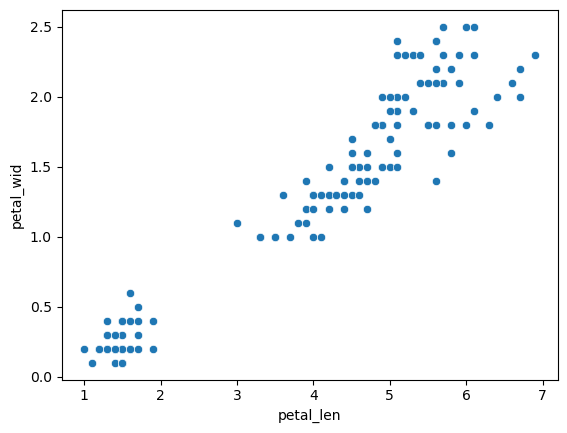

In [33]:
import seaborn as sns
#sns scatterplot (iris['petal_len'], iris['sepal_wid']);
sns.scatterplot(iris['petal_len'], iris['petal_wid']);